<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

**Описание данных**

- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата

**Целевой признак**
- Exited — факт ухода клиента


In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score

<font size = 3>**Считаем данные в таблицу и посмотрим что в ней есть. Посмотрим общую информацию о данных, размер таблицы, сами данные. Проверим пропуски. Для этого используем методы info, shape, head, isna.**</font>

In [ ]:
data = pd.read_csv("/datasets/Churn.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [ ]:
data.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [ ]:
data.shape

(10000, 14)

In [ ]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


<font size=3>**Всего в таблице 10_000 строк и 14 столбцов. Данные смешанные - есть количественные и есть категориальные. Есть пропуски в одном столбце - "Tenure" (заполнены NaN). То есть, про 909 человек (это примерно 10% - много) нет информации о том, сколько по времени они являются клиентами банка.**

Как обработать пропуски в столбце "Tenure".
- удалить
- заполнить медианой
- обучить модель
    
Сначала я хотела заполнить пропуски значениями, которые предскажет модель. Для этого выбрала "Tenure" в качестве целевого признака, разбила данные на две выборки. Тренировочная - без пропусков и тестовая - с пропусками. Попыталась обучить модель. Но вероятно сразу этого было делать нельзя, надо было сначала подготовить данные. Поэтому на разных моделях (решающее дерево, случайный лес, логистическая регрессия), оценки качества были низкие - не превысили 0.1139463264408271.
    
Поэтому, просто удалим пропуски.

**Это 10% от всей выборки. Не мало, но и не так много.** </font>

In [ ]:
data.dropna(subset=['Tenure'], how='all', inplace=True)
#data['Tenure']=data['Tenure'].fillna(0)

In [ ]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9091 non-null   int64  
 1   CustomerId       9091 non-null   int64  
 2   Surname          9091 non-null   object 
 3   CreditScore      9091 non-null   int64  
 4   Geography        9091 non-null   object 
 5   Gender           9091 non-null   object 
 6   Age              9091 non-null   int64  
 7   Tenure           9091 non-null   float64
 8   Balance          9091 non-null   float64
 9   NumOfProducts    9091 non-null   int64  
 10  HasCrCard        9091 non-null   int64  
 11  IsActiveMember   9091 non-null   int64  
 12  EstimatedSalary  9091 non-null   float64
 13  Exited           9091 non-null   int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.0+ MB


<font size = 3>**Почти все типы данных в таблице приведены в соответсвие. Данные - "HasCrCard — наличие кредитной карты" и
"IsActiveMember — активность клиента" стоит привести к логическому типу.**</font>

In [ ]:
data['HasCrCard'] = data['HasCrCard'].astype('bool')
data['IsActiveMember'] = data['IsActiveMember'].astype('bool')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9091 non-null   int64  
 1   CustomerId       9091 non-null   int64  
 2   Surname          9091 non-null   object 
 3   CreditScore      9091 non-null   int64  
 4   Geography        9091 non-null   object 
 5   Gender           9091 non-null   object 
 6   Age              9091 non-null   int64  
 7   Tenure           9091 non-null   float64
 8   Balance          9091 non-null   float64
 9   NumOfProducts    9091 non-null   int64  
 10  HasCrCard        9091 non-null   bool   
 11  IsActiveMember   9091 non-null   bool   
 12  EstimatedSalary  9091 non-null   float64
 13  Exited           9091 non-null   int64  
dtypes: bool(2), float64(3), int64(6), object(3)
memory usage: 941.1+ KB


<font size = 3>**Удалим лишние столбцы, которые являются незначимыми признаками. К таким данным можно отнести - "RowNumber", "CustomerId", "Surname".**</font>

In [ ]:
drop_col = ['RowNumber','CustomerId', 'Surname']
data = data.drop(drop_col, axis=1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,True,True,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,False,True,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,True,False,113931.57,1
3,699,France,Female,39,1.0,0.00,2,False,False,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,True,True,79084.10,0


<font size = 3>**Преобразуем категориальные признаки "Gender", "Geography" в численные, техникой прямого кодирования. Она работает со всеми моделями.**</font>

In [ ]:
data_gender = pd.get_dummies(data['Gender'], drop_first=True)
data_gender.head()

,Male
0,0
1,0
2,0
3,0
4,0


In [ ]:
print(data['Geography'].unique())
data_geagraphy = pd.get_dummies(data['Geography'],drop_first=True)
data_geagraphy.head()

['France' 'Spain' 'Germany']


,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [ ]:
data_new = pd.concat([data, data_geagraphy,data_gender], axis='columns')
data_new=data_new.drop(['Geography', 'Gender'], axis='columns')
data_new

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,42,2.0,0.00,1,True,True,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,False,True,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,True,False,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,False,False,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,True,True,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9994,800,29,2.0,0.00,2,False,False,167773.55,0,0,0,0
9995,771,39,5.0,0.00,2,True,False,96270.64,0,0,0,1
9996,516,35,10.0,57369.61,1,True,True,101699.77,0,0,0,1
9997,709,36,7.0,0.00,1,False,True,42085.58,1,0,0,0


<font size=3>Проведем масштабирование данных в столбцах "CreditScore", "Age", "Balance", "EstimatedSalary".</font>

In [ ]:
#data_new.head()

<font size =3>Данные в датасете подготовлены.
- Масштабированы - (будут позже)
- приведены к численным значениям методом OHE
- заполнены пропуски

Можно приступать к исследованию задачи.</font>

<font size=3>Поделим датасет на три выборки: тренировочную, валидационную и тестовую. Обработанные данные в новом датафрейте - data_new</font>

In [ ]:
target = data_new['Exited']
features = data_new.drop('Exited',axis=1)

In [ ]:
feature_train, feature_test, target_train, target_test = train_test_split(
    features, target, test_size=0.2, random_state=12345,stratify=target)

In [ ]:
feature_train, feature_valid, target_train, target_valid = train_test_split(
    feature_train, target_train,test_size=0.2, random_state=12345, stratify=target_train)

In [ ]:
feature_train.shape

(5817, 11)

In [ ]:
pd.options.mode.chained_assignment = None # чтобы не вылетала ошибка
scaler=StandardScaler()
numeric = ["CreditScore", "Age", "Balance", "EstimatedSalary"] #выбрали столбцы для масштабирования
scaler.fit(feature_train[numeric])

feature_train[numeric] = scaler.transform(feature_train[numeric])
feature_valid[numeric] = scaler.transform(feature_valid[numeric])
feature_test[numeric] = scaler.transform(feature_test[numeric])

In [ ]:
feature_train.head() #посмотрим на результат

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
5843,0.610451,-1.689217,4.0,0.533455,2,True,True,-0.754290,0,0,1
2075,0.610451,0.573575,9.0,0.518987,1,True,True,1.545171,1,0,1
1013,-0.170720,-1.406368,4.0,-1.221743,2,True,True,-0.502830,0,1,1
3038,0.964582,0.762141,9.0,-1.221743,2,True,False,0.235293,0,0,1
4104,2.068637,1.516405,6.0,-1.221743,1,True,False,-1.713933,0,0,1


<font size=3>Выполним контроль корректности разбиения</font>

In [ ]:
print("Обучающая выборка",feature_train.shape, target_train.shape)
print("Тестовая выборка",feature_test.shape, target_test.shape)
print("Валидационная выборка",feature_valid.shape, target_valid.shape)

Обучающая выборка (5817, 11) (5817,)
Тестовая выборка (1819, 11) (1819,)
Валидационная выборка (1455, 11) (1455,)


<font size=3>Разбиение корректное. Исследуем разные модели. </font>

In [ ]:
def accuracy_model(feature_train, target_train, feature_valid, target_valid):
    model_DTC = DecisionTreeClassifier(random_state=12345, max_depth=5)
    DTC_score = model_DTC.fit(feature_train, target_train).score(feature_valid, target_valid)

    model_RFC = RandomForestClassifier(max_depth=9, n_estimators=9, random_state=12345)
    RFC_score = model_RFC.fit(feature_train, target_train).score(feature_valid, target_valid)

    model_LgR = LogisticRegression(solver = 'liblinear')
    LgR_score = model_LgR.fit(feature_train, target_train).score(feature_valid, target_valid)

    print("Качество:" "\nдерево решений", DTC_score, ";\nCлучайный лес ", RFC_score, ";\nЛогистическая регрессия", LgR_score)

In [ ]:
%%time
accuracy_model(feature_train, target_train, feature_valid, target_valid)

Качество:
дерево решений 0.8529209621993127 ;
Cлучайный лес  0.8646048109965636 ;
Логистическая регрессия 0.8061855670103093
CPU times: user 105 ms, sys: 24 ms, total: 129 ms
Wall time: 111 ms


Accuracy моделей и константной модели близки. Это плохо.

**Проверим адекватность модели. Исследуем целевой признак.**
Чтобы оценить адекватность модели, проверим, как часто в целевом признаке встречается класс «1» или «0». Затем создадим константную модель и сравним результаты. </font>

0    0.923711
1    0.076289
dtype: float64


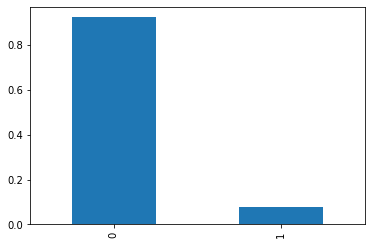

In [ ]:
model_DTC = DecisionTreeClassifier(random_state=12345, max_depth=5)
model_DTC.fit(feature_train, target_train)

predicted_valid = pd.Series(model_DTC.predict(feature_valid))
class_frequency = predicted_valid.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar');



0    0.913402
1    0.086598
dtype: float64


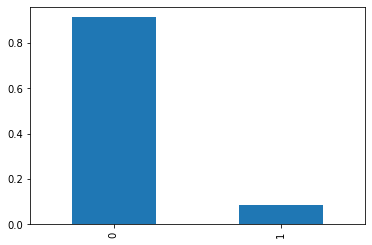

In [ ]:
model_RFC = RandomForestClassifier(random_state=12345, n_estimators = 5, max_depth=5)
model_RFC.fit(feature_train, target_train)

predicted_valid = pd.Series(model_RFC.predict(feature_valid))
class_frequency = predicted_valid.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar');

0    0.930584
1    0.069416
dtype: float64


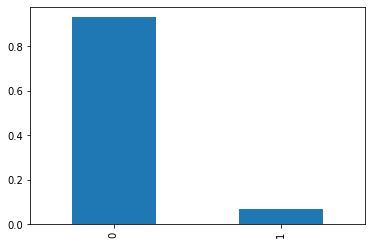

In [ ]:
model_LgR = LogisticRegression(solver = 'liblinear')
model_LgR.fit(feature_train, target_train)

predicted_valid = pd.Series(model_LgR.predict(feature_valid))
class_frequency = predicted_valid.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar');

Посчитаем количество положительных и отрицательных ответов и сравним для разных моделей.

In [ ]:
def all_models(feature_train, target_train, feature_valid, target_valid):
    model_DTC = DecisionTreeClassifier(random_state=12345, max_depth=5)
    model_DTC.fit(feature_train, target_train)
    DTC_series = pd.Series(model_DTC.predict(feature_valid)).value_counts(normalize = 1)


    model_RFC = RandomForestClassifier(random_state=12345, n_estimators = 5, max_depth=5)
    model_RFC.fit(feature_train, target_train)
    RFC_series = pd.Series(model_RFC.predict(feature_valid)).value_counts(normalize = 1)

    model_LgR = LogisticRegression(solver = 'liblinear')
    model_LgR.fit(feature_train, target_train)
    LgR_series = pd.Series(model_LgR.predict(feature_valid)).value_counts(normalize = 1)

    print(f"Соотношения ответов:\n\nДерево решений\n{DTC_series}, \n\nСлучайный лес\n{RFC_series}, \n\nЛогистическая регрессия\n{LgR_series}" , end='\n')

In [ ]:
all_models(feature_train, target_train, feature_valid, target_valid)

Соотношения ответов:

Дерево решений
0    0.923711
1    0.076289
dtype: float64, 

Случайный лес
0    0.913402
1    0.086598
dtype: float64, 

Логистическая регрессия
0    0.930584
1    0.069416
dtype: float64


Наблюдается сильный дисбаланс классов, что плохо сказывается на обучении модели. Классы несбалансированны, так как их соотношение далеко от 1:1. Баланс классов наблюдается, если их количество примерно равно. Accuracy не подходит.

## Борьба с дисбалансом

**Построим матрицы ошибок для всех моделей.**

In [ ]:
model_DTC = DecisionTreeClassifier(random_state=12345, max_depth=5)
model_DTC.fit(feature_train, target_train)
predicted_valid = model_DTC.predict(feature_valid)
print(confusion_matrix(target_valid,predicted_valid))


[[1144   14]
 [ 200   97]]


In [ ]:
model_RFC = RandomForestClassifier(random_state=12345, n_estimators = 9, max_depth=9)
model_RFC.fit(feature_train, target_train)
predicted_valid = model_RFC.predict(feature_valid)
print(confusion_matrix(target_valid,predicted_valid))

[[1127   31]
 [ 166  131]]


In [ ]:
model_LR=LogisticRegression(solver = 'liblinear')
model_LR.fit(feature_train, target_train)
predicted_valid = model_LR.predict(feature_valid)
print(confusion_matrix(target_valid,predicted_valid))

[[1115   43]
 [ 239   58]]


Видим, что все три модели дают пессимистичный ответ.
Посчитаем значения метрик: полноту, точность до балансировки.

In [ ]:
def metrics_recal_precision(target_valid, predicted_valid):
    model_DTC = DecisionTreeClassifier(random_state=12345, max_depth=9)
    model_DTC.fit(feature_train, target_train)

    predicted_DTC = model_DTC.predict(feature_valid)
    rc_DTC=recall_score(target_valid, predicted_DTC)
    pr_scDTC = precision_score(target_valid, predicted_DTC)
    f1_DTC = f1_score(target_valid, predicted_DTC)
    DTC_score = model_DTC.score(feature_valid, target_valid)


    model_RFC = RandomForestClassifier(random_state=12345, n_estimators = 16, max_depth=9)
    model_RFC.fit(feature_train, target_train)
    predicted_RFC = model_RFC.predict(feature_valid)
    rc_RFC=recall_score(target_valid, predicted_RFC)
    pr_scRFC = precision_score(target_valid, predicted_RFC)
    f1_RFC = f1_score(target_valid, predicted_RFC)
    RFC_score = model_RFC.score(feature_valid, target_valid)


    model_LgR = LogisticRegression(solver = 'liblinear')
    model_LgR.fit(feature_train, target_train)
    predicted_LgR = model_LgR.predict(feature_valid)
    rc_LgR=recall_score(target_valid, predicted_LgR)
    pr_scLgR = precision_score(target_valid, predicted_LgR)
    f1_LgR = f1_score(target_valid, predicted_LgR)
    LgR_score = model_LgR.score(feature_valid, target_valid)

    print(f"Решающее дерево: \naccuracy: {DTC_score}\nrecall: {rc_DTC} \nprecision: {pr_scDTC} \nF1-мера :{f1_DTC}\n")
    print(f"Случайный лес: \naccuracy: {RFC_score}\nrecall: {rc_RFC} \nprecision: {pr_scRFC} \nF1-мера :{f1_RFC}\n")
    print(f"Логистическая регрессия: \naccuracy: {LgR_score}\nrecall: {rc_LgR} \nprecision: {pr_scLgR} \nF1-мера :{f1_LgR}\n")


In [ ]:
metrics_recal_precision(target_valid, predicted_valid)

Решающее дерево: 
accuracy: 0.8474226804123711
recall: 0.45454545454545453 
precision: 0.6923076923076923 
F1-мера :0.5487804878048781

Случайный лес: 
accuracy: 0.8652920962199313
recall: 0.4478114478114478 
precision: 0.806060606060606 
F1-мера :0.5757575757575758

Логистическая регрессия: 
accuracy: 0.8061855670103093
recall: 0.19528619528619529 
precision: 0.5742574257425742 
F1-мера :0.2914572864321608



Случайный лес дает лучшую точность.

Увеличим выборку.

In [ ]:
def upsample(feature, target, repeat):
    feature_zeros = feature[target == 0]
    feature_ones = feature[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    feature_upsampled = pd.concat([feature_zeros] + [feature_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    feature_upsampled, target_upsampled = shuffle(
        feature_upsampled, target_upsampled, random_state=12345)

    return feature_upsampled, target_upsampled


In [ ]:
feature_upsampled, target_upsampled = upsample(feature_train, target_train,4)

print(feature_upsampled.shape)
print(target_upsampled.shape)
print(target_upsampled.value_counts(normalize = 1))

(9375, 11)
(9375,)
1    0.506027
0    0.493973
Name: Exited, dtype: float64


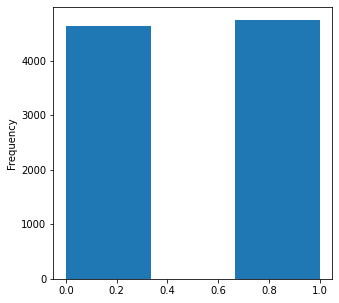

In [ ]:
target_upsampled.plot(kind ='hist', bins=3, figsize=(5,5));

Уменьшим выборку.

In [ ]:
def downsample(feature, target, fraction):
    feature_zeros = feature[target == 0]
    feature_ones = feature[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    feature_downsampled = pd.concat(
        [feature_zeros.sample(frac=fraction, random_state=12345)] + [feature_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])

    feature_downsampled, target_downsampled = shuffle(
        feature_downsampled, target_downsampled, random_state=12345)

    return feature_downsampled, target_downsampled

In [ ]:
feature_downsampled, target_downsampled = downsample(feature_train, target_train, 0.25)

print(feature_downsampled.shape)
print(target_downsampled.shape)
print(target_downsampled.value_counts(normalize = 1))

(2344, 11)
(2344,)
1    0.505973
0    0.494027
Name: Exited, dtype: float64


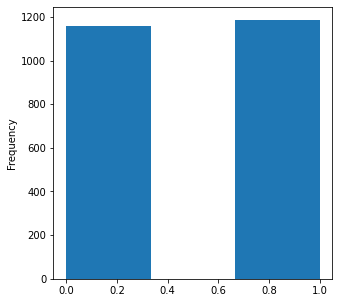

In [ ]:
target_downsampled.plot(kind ='hist', bins=3, figsize=(5,5));

Увеличение выборки позволило получить лучший набор данных. Проверим метрики на сбалансированных данных.

In [ ]:
best_model = 0
best_f1 = 0
for depth in range(1, 20):
    model_DTC = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_DTC.fit(feature_upsampled, target_upsampled)
    predicted_DTC = model_DTC.predict(feature_valid)
    f1_DTC = f1_score(target_valid, predicted_DTC)

    if f1_DTC > best_f1:
        best_model = model_DTC
        best_depth = depth
        best_f1 = f1_DTC


print('Оптимальная глубина дерева =', best_depth)
print('Качество модели - ', best_f1)

Оптимальная глубина дерева = 6
Качество модели -  0.5753768844221105


In [ ]:
model_DTC = DecisionTreeClassifier(random_state=12345, max_depth=5)
model_DTC.fit(feature_upsampled, target_upsampled)
predicted_DTC = model_DTC.predict(feature_valid)
f1_DTC = f1_score(target_valid, predicted_DTC)
f1_DTC

0.5589622641509435

In [ ]:
predicted_DTC_auc = model_DTC.predict_proba(feature_valid)[:, 1]
auc_roc_DTC = roc_auc_score(target_valid, predicted_DTC)

DTC_score = model_DTC.score(feature_upsampled, target_upsampled)
rc_DTC=recall_score(target_valid, predicted_DTC)
pr_scDTC = precision_score(target_valid, predicted_DTC)

print("Решающее дерево:")
print("auc_roc_DTC", auc_roc_DTC)
print("Accuracy: ",DTC_score)
print("reccal",rc_DTC)
print("precision:",pr_scDTC)
print("f1:",f1_DTC,'\n')

Решающее дерево:
auc_roc_DTC 0.7634113152247868
Accuracy:  0.77312
reccal 0.797979797979798
precision: 0.4301270417422868
f1: 0.5589622641509435 



In [ ]:
#Подберем лучшие параметры. Конечно работает долго
best_model = 0
best_f1 = 0
n_best = 0
for depth in range(1, 10):
    for n in range(1,50):
        model_RFC = RandomForestClassifier(random_state=12345, n_estimators = n, max_depth=depth)
        model_RFC.fit(feature_upsampled, target_upsampled)
        predicted_RFC = model_RFC.predict(feature_valid)
        f1_RFC = f1_score(target_valid, predicted_RFC)
        if f1_RFC > best_f1:
            best_model = model_RFC
            best_depth = depth
            best_f1 = f1_RFC
            n_best = n

print('Оптимальная глубина дерева =', best_depth, ' количество', n_best)
print('Качество модели - ', best_f1)

Оптимальная глубина дерева = 8  количество 23
Качество модели -  0.6055312954876273


In [ ]:
model_LgR = LogisticRegression(solver = 'liblinear')
model_LgR.fit(feature_upsampled, target_upsampled)
predicted_LgR = model_LgR.predict(feature_valid)

predicted_LgR_auc = model_LgR.predict_proba(feature_valid)[:, 1]

auc_roc_LgR = roc_auc_score(target_valid, predicted_LgR)
predicted_LgR = model_LgR.predict(feature_valid)

LgR_score = model_LgR.score(feature_upsampled, target_upsampled)
rc_LgR=recall_score(target_valid, predicted_LgR)
pr_scLgR = precision_score(target_valid, predicted_LgR)
f1_LgR = f1_score(target_valid, predicted_LgR)

print("Логистическая регрессия:")
print("auc_roc", auc_roc_RFC)
print("Accuracy: ",LgR_score)
print("reccal",rc_LgR)
print("precision:",pr_scLgR)
print("f1:",f1_LgR)

Логистическая регрессия:
auc_roc 0.7715845850560876
Accuracy:  0.70752
reccal 0.7205387205387206
precision: 0.3787610619469027
f1: 0.49651972157772634


Лучшая модель - случайный лес. Ее и будем использовать.

Случайный лес:
- auc_roc_DTC 0.7817199035025667
- Accuracy:  0.8429874814343306
- reccal 0.7092198581560284
- precision: 0.5390835579514824
- f1: 0.6125574272588055


Оптимальная глубина дерева = 9  количество 34

 Проверим модель на тестовой выборке.

In [ ]:
model_RFC = RandomForestClassifier(max_depth= 6,  n_estimators = 23, random_state=12345)
model_RFC.fit(feature_upsampled, target_upsampled)
model_RFC_predict = model_RFC.predict(feature_test)


DTC_score = model_DTC.score(feature_test, target_test)
rc_DTC=recall_score(target_test, model_RFC_predict)
pr_scDTC = precision_score(target_test, model_RFC_predict)
f1_DTC = f1_score(target_test, model_RFC_predict)

print("Качество:", DTC_score)
print("Полнота",rc_DTC)
print("Точность", pr_scDTC)
print("f1", f1_DTC)

Качество: 0.7405167674546455
Полнота 0.7304582210242587
Точность 0.5211538461538462
f1 0.6083052749719415


Посчитаем auc_roc для RFC на тестовой выборке

In [ ]:
model_RFC_valid = model_RFC.predict_proba(feature_test)[:, 1]
auc_roc_RFC = roc_auc_score(target_test, model_RFC_valid)
auc_roc_RFC

0.8560985688969636

Создаем константную модель

In [ ]:
target_predict_constant = pd.Series([0]*len(feature_test))
target_predict_constant.value_counts()

0    1819
dtype: int64

Сравним точность модели с константной

In [ ]:
print('accuracy_score_const:', accuracy_score(target_test, target_predict_constant))
print('accuracy_score модели:', accuracy_score(target_test, model_RFC_predict))


print('AUC-ROC константой модели:', roc_auc_score(target_test, target_predict_constant))
print('AUC-ROC модели:', roc_auc_score(target_test, model_RFC_predict))

accuracy_score_const: 0.7960417811984607
accuracy_score модели: 0.8081363386476086
AUC-ROC константой модели: 0.5
AUC-ROC модели: 0.7792484475287039


<font size=4>**Выводы:**

- В ходе изучения данных датасета выявлены пропуски, наличие категориальных данных вместе с количественными.<br/>

- Данные обработаны, пропуски удалены, категориальные признаки приведены к количественным техникой прямого кодирования. <br/>

- Выполнено масштабирование данных.<br/>

- В ходе исследования моделей, выявился дисбаланс классов. <br/>

- Дисбаланс был устранен путем увеличения выборки. Были проверены различные метрики на разных моделях.<br/>

- Наилучшее поведение показала модель – случайный лес. При оптимальной глубине дерева = 9 и количестве деревьев – 43 были достигнуты следующие показатели:<br/>

        Случайный лес:
        - auc_roc_DTC 0.7715845850560876
        - Accuracy:  0.8443733333333333
        - recal 0.7003367003367004
        - precision: 0.5333333333333333
        - f1: 0.6055312954876273

- Модель была проверена на тестовой выборке. Получены следующие показатели.<br/>
        - AUC-ROC модели: 0.7792484475287039
        - Качество: 0.7405167674546455
        - Полнота 0.7304582210242587
        - Точность 0.5211538461538462
        - f1 0.6083052749719415
    
    Новые:Оптимальная глубина дерева = 8 количество 23.
    
    
</font>